# CAPITAL ONE FINANCIAL CORPORATION
---
**Data source**: https://www.consumerfinance.gov/data-research/consumer-complaints

**Citation**: Consumer Financial Protection Bureau. “Consumer Complaint Database.”
Accessed January 7, 2026.

---

## Business context:

---

Analyze customer data over time where the dataset. <br>
The company is preparing for its next financial year, during which key investment decisions will be made. <br>
This dataset will be analyzed and reported to the Chief Financial Officer (CFO) and the Chief Customer Success Officer (CCSO). <br>

**Below are the key priorities for this analytics work**: <br>
1. Identify key areas for improvement and target investment effectively 
2. Focus investment on reducing complaint volume
3. Improve customer outcomes across products and services
4. Ensure the company remains fully compliant with laws and regulations

## Key headers:
---

- [Data Import and Wrangling](#DATA-IMPORT-AND-WRANGLING)
  
- [Exploratory Data Analysis](#EDA)
  
- [Model Evaluation](#MODEL-EVALUATION)

- [Insight Generation](#INSIGHT)
  
- [Strategic Recommendations](#STRATEGIC-RECOMMENDATION)

## About Dataset
---

The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response.<br> 
Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. <br> 
Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, <br> 
are not published in the Consumer Complaint Database. The database generally updates daily. 

---

## Conclusion
---

- Compliance concerns to take highest priority, especially Capital Theft, fraud handling which effects customer personal and financial information
Where the Credit card and Credit reporting, credit repair services, or other personal consumer reports has the top complaint volumne

- CKey Product to Improve is mainly Credit Card, Credit reporting and account

- CInvestment in Human Resource for 
>- Software:
>  Data analytics, IT, and Engineer
>- Reporting correctness:
>  Finance
>- Customer Service:
>  customer operation department

- Focus to implement the solutions by giving the priority on the major states including California, Florida and Texas
>Highest number of complaints volumn from overall US market

# DATA IMPORT AND WRANGLING
---
[Home](#CAPITAL-ONE-FINANCIAL-CORPORATION)
- Load consumer complaint data from source files
- Remove null or incomplete records

[Next](#EDA)


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/smilesimile/Downloads/DATA-20250820T135424Z-1-001/DATA/complaints.csv')

In [3]:
# Format all column names: lowercase + underscores
df.columns = (df.columns.str.lower().str.replace(' ', '_').str.replace(r'[^a-z0-9_]', '', regex=True))

In [4]:
# Get counts of each company
company_counts = df['company'].value_counts()

# Filter companies with counts between 100000 and 200000
filtered_companies = company_counts[(company_counts >= 100000) & (company_counts <= 200000)]
filtered_companies

company
BANK OF AMERICA, NATIONAL ASSOCIATION    166186
WELLS FARGO & COMPANY                    155354
JPMORGAN CHASE & CO.                     153197
CAPITAL ONE FINANCIAL CORPORATION        142975
CITIBANK, N.A.                           121359
Name: count, dtype: int64

In [5]:
company = df[df['company'] == 'CAPITAL ONE FINANCIAL CORPORATION']

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142975 entries, 12 to 12126082
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 142975 non-null  object
 1   product                       142975 non-null  object
 2   subproduct                    129685 non-null  object
 3   issue                         142975 non-null  object
 4   subissue                      123005 non-null  object
 5   consumer_complaint_narrative  63811 non-null   object
 6   company_public_response       3 non-null       object
 7   company                       142975 non-null  object
 8   state                         141786 non-null  object
 9   zip_code                      142068 non-null  object
 10  tags                          17457 non-null   object
 11  consumer_consent_provided     112836 non-null  object
 12  submitted_via                 142975 non-null  object
 13  d

In [7]:
print(company.shape)
company.head()

(142975, 18)


date_received                                            product  \
12     2019-12-26                        Credit card or prepaid card   
275    2025-08-15  Credit reporting or other personal consumer re...   
689    2025-09-24                                        Credit card   
763    2025-11-03                        Checking or savings account   
887    2025-11-14  Credit reporting or other personal consumer re...   

                                     subproduct  \
12   General-purpose credit card or charge card   
275                            Credit reporting   
689  General-purpose credit card or charge card   
763                            Checking account   
887                            Credit reporting   

                                                 issue  \
12   Advertising and marketing, including promotion...   
275                        Improper use of your report   
689    Problem with a purchase shown on your statement   
763  Problem with a lender or other company chargin...   
887                        Improper use of your report   

                                              subissue  \
12   Confusing or misleading advertising about the ...   
275  Credit inquiries on your report that you don't...   
689  Credit card company isn't resolving a dispute ...   
763                     Transaction was not authorized   
887  Credit inquiries on your report that you don't...   

                          consumer_complaint_narrative  \
12                                                 NaN   
275  On XX/XX/scrub>, 2025 I received a text saying...   
689  To Whom It May Concern, I am filing this compl...   
763                                                NaN   
887                                                NaN   

    company_public_response                            company state zip_code  \
12                      NaN  CAPITAL ONE FINANCIAL CORPORATION    CA    94025   
275                     NaN  CAPITAL ONE FINANCIAL CORPORATION    IN    463XX   
689                     NaN  CAPITAL ONE FINANCIAL CORPORATION    CA    92612   
763                     NaN  CAPITAL ONE FINANCIAL CORPORATION    CA    95834   
887                     NaN  CAPITAL ONE FINANCIAL CORPORATION    MN    55337   

    tags consumer_consent_provided submitted_via date_sent_to_company  \
12   NaN      Consent not provided           Web           2019-12-26   
275  NaN          Consent provided           Web           2025-08-15   
689  NaN          Consent provided           Web           2025-09-24   
763  NaN                       NaN           Web           2025-11-03   
887  NaN                       NaN           Web           2025-11-14   

        company_response_to_consumer timely_response consumer_disputed  \
12           Closed with explanation             Yes               NaN   
275  Closed with non-monetary relief             Yes               NaN   
689      Closed with monetary relief             Yes               NaN   
763          Closed with explanation             Yes               NaN   
887          Closed with explanation             Yes               NaN   

     complaint_id  
12        3477549  
275      15305109  
689      16150622  
763      16987974  
887      17248699

In [8]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142975 entries, 12 to 12126082
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 142975 non-null  object
 1   product                       142975 non-null  object
 2   subproduct                    129685 non-null  object
 3   issue                         142975 non-null  object
 4   subissue                      123005 non-null  object
 5   consumer_complaint_narrative  63811 non-null   object
 6   company_public_response       3 non-null       object
 7   company                       142975 non-null  object
 8   state                         141786 non-null  object
 9   zip_code                      142068 non-null  object
 10  tags                          17457 non-null   object
 11  consumer_consent_provided     112836 non-null  object
 12  submitted_via                 142975 non-null  object
 13  d

# EDA
---
[Home](#CAPITAL-ONE-FINANCIAL-CORPORATION)
- **Payday Loan has the highest rate** proportion of normal complaint and with narrative complaint case
- Identify high‑volume or high‑risk categories  
- Visualize case status 

[Next](#MODEL-EVALUATION)

In [9]:
%pip install spacy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [10]:
import collections
from tqdm import tqdm
import spacy
import re

#### Plot time series chart to see the customer complaints trend over years
---
There's the outlier in **Jan 17, 2025**
- Deposits and withdrawals SubIssue has received highest complaints volume
- Checking account was the product that was reported on the day

In [11]:
import plotly.express as px

# Make sure your date column is in datetime format
company['date_received'] = pd.to_datetime(company['date_received'])

# Count complaints by month (or day)
complaints_over_time = (
    company
    .groupby(pd.Grouper(key='date_received', freq='M'))  # 'M' = monthly, use 'D' for daily
    ['complaint_id']
    .count()
    .reset_index()
    .rename(columns={'complaint_id': 'complaint_count'})
)

# Plot
fig = px.line(
    complaints_over_time,
    x='date_received',
    y='complaint_count',
    title='Complaint Volume Over Time',
    markers=True
)

fig.show()


C:\Users\smilesimile\AppData\Local\Temp\ipykernel_22052\1189937103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['date_received'] = pd.to_datetime(company['date_received'])
C:\Users\smilesimile\AppData\Local\Temp\ipykernel_22052\1189937103.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='date_received', freq='M'))  # 'M' = monthly, use 'D' for daily


In [12]:
daily_counts = (
    company
    .groupby(pd.Grouper(key='date_received', freq='D'))   # daily
    ['complaint_id']
    .count()
    .reset_index()
    .rename(columns={'complaint_id': 'complaint_count'})
)


In [13]:
jan25_df = daily_counts[
    (daily_counts['date_received'].dt.year == 2025) &
    (daily_counts['date_received'].dt.month == 1)
]

fig = px.line(
    jan25_df,
    x='date_received',
    y='complaint_count',
    title="Daily Complaint Volume — January 2025",
    markers=True
)

fig.show()


In [14]:
# Filter to Jan 17, 2025
jan17 = company[
    pd.to_datetime(company['date_received']) == '2025-01-17'
]

# Count complaints by subissue
subissue_counts = (
    jan17
    .groupby('subissue')['complaint_id']
    .count()
    .reset_index()
    .rename(columns={'complaint_id': 'complaint_count'})
)

# Keep only Top 5
top5_subissues = (
    subissue_counts
    .sort_values('complaint_count', ascending=False)
    .head(5)
)

plt.figure(figsize=[4,6])
fig = px.bar(
    top5_subissues,
    x='subissue',
    y='complaint_count',
    title="Top 5 Subissues on January 17, 2025"
)

fig.show()


In [15]:
# Count complaints by product + subproduct
prod_sub_counts = (
    jan17
    .groupby(['product', 'subproduct'])['complaint_id']
    .count()
    .reset_index()
    .rename(columns={'complaint_id': 'complaint_count'})
)

# Identify Top 5 products by total complaints
top5_products = (
    prod_sub_counts
    .groupby('product')['complaint_count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
    .tolist()
)

# Filter to only those top 5 products
top5_df = prod_sub_counts[prod_sub_counts['product'].isin(top5_products)]

# Plot
plt.figure(figsize=[8,14])
fig = px.bar(
    top5_df,
    x='product',
    y='complaint_count',
    color='subproduct',   # hue
    title="Top 5 Products on January 17, 2025 (Colored by Subproduct)",
    barmode='group'
)

fig.show()


### Add column to define whether customer left the complaint or not

In [16]:
# Create a new column 'has_complaint'
company['has_complaint'] = np.where(company['consumer_complaint_narrative'].notna(), 1, 0)

C:\Users\smilesimile\AppData\Local\Temp\ipykernel_22052\132926755.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Create prod_pct to identify proportion of normal complaint and with narrative complaint case

- **Payday loan** has the highest rate that customer tend to leave their narrative complaint

In [17]:
prod_pct = (
    company.groupby('product')['has_complaint']
           .mean()
           .reset_index(name='percentage')
)

prod_pct['percentage'] *= 100

C:\Users\smilesimile\AppData\Local\Temp\ipykernel_22052\2855258680.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 400x600 with 0 Axes>

<Figure size 800x1400 with 0 Axes>

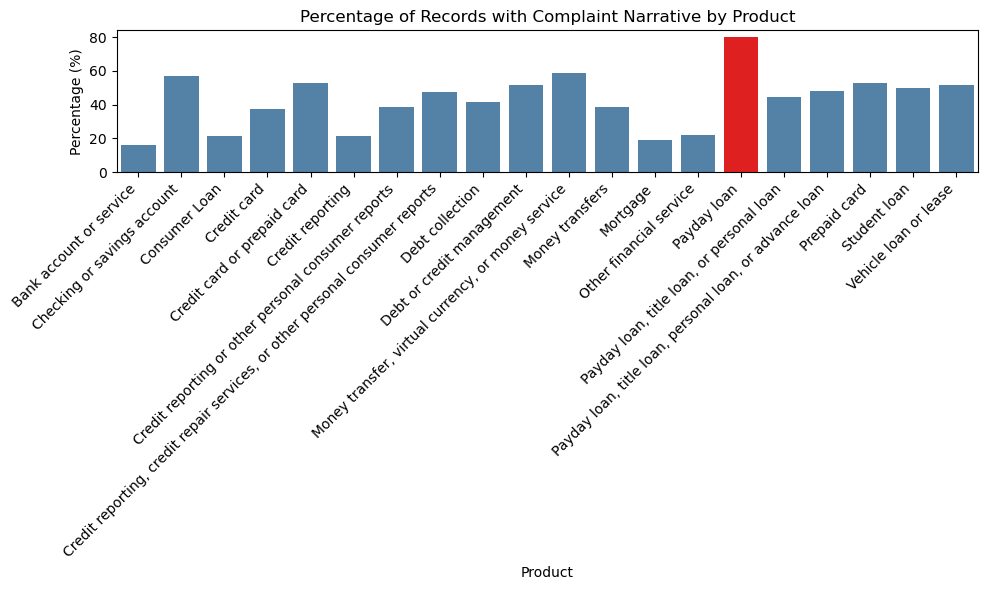

In [18]:
# Create a color list: red if >50%, blue otherwise
colors = ['red' if val > 60 else 'steelblue' for val in prod_pct['percentage']]

plt.figure(figsize=(10, 6))

sns.barplot(
    data=prod_pct,
    x='product',
    y='percentage',
    palette=colors
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
plt.xlabel('Product')
plt.title('Percentage of Records with Complaint Narrative by Product')

plt.tight_layout()
plt.show()

### Determine case status
To review if any product got dispute by customer and the status as well for company to take priority on the 

- Product with complaint volume greater than 10,000 cases, still has not been solved <br>
  Result as more than 60,000 still has not been solved

In [19]:
def classify(row):
    if row['timely_response'] == 'Yes' and row['consumer_disputed'] == 'Yes':
        return 'dispute'
    elif row['timely_response'] == 'Yes' and row['consumer_disputed'] == 'No':
        return 'solved'
    elif row['timely_response'] == 'Yes' and pd.isna(row['consumer_disputed']):
        return 'pending'
    else:
        return 'else'

company['case_status'] = company.apply(classify, axis=1)

C:\Users\smilesimile\AppData\Local\Temp\ipykernel_22052\2176820356.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



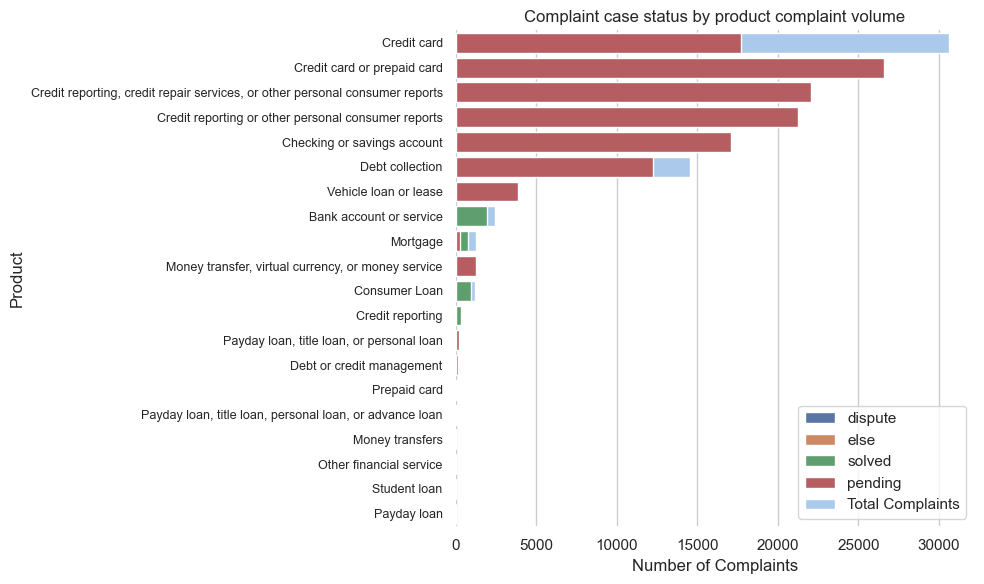

In [20]:
sns.set_theme(style="whitegrid")

# --- Prepare data ---
# Count complaints by product × case_status
prod_status = (
    company.groupby(['product', 'case_status'])
           .size()
           .reset_index(name='count')
)

# Total complaints per product
prod_totals = (
    prod_status.groupby('product')['count']
               .sum()
               .reset_index(name='total')
)

# Merge totals back
prod_status = prod_status.merge(prod_totals, on='product')

# Sort products by total complaints
prod_totals = prod_totals.sort_values('total', ascending=False)

# --- Plot ---
f, ax = plt.subplots(figsize=(10, 6))

# Base layer: total complaints (pastel)
sns.set_color_codes("pastel")
sns.barplot(
    x="total",
    y="product",
    data=prod_totals,
    label="Total Complaints",
    color="b"
)

# Overlay: each case_status (muted)
sns.set_color_codes("muted")
sns.barplot(
    x="count",
    y="product",
    hue="case_status",
    data=prod_status,
    dodge=False,   # overlay, not side-by-side
)

# Legend & labels
ax.legend(loc="lower right", frameon=True)
ax.set(
    xlabel="Number of Complaints",
    ylabel="Product",
    title="Complaint case status by product complaint volume"
)

ax.tick_params(axis='y', labelsize=9)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Clean text and word

In [21]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'x+', '', text)        # remove ANY sequence of x or X
    text = re.sub(r'\d+', '', text)       # remove digits
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters and spaces
    return text

def is_clean_word(word):
    return (
        re.match(r'^[a-z]{3,}$', word) and   # only letters, min length 3
        not re.match(r'^x+$', word)          # exclude any 'xxx...'
    )


In [22]:
company = company.copy()

# Ensure date is datetime
company['date_received'] = pd.to_datetime(company['date_received'])

# Clean narrative
company.loc[:, 'clean_narrative'] = (
    company['consumer_complaint_narrative']
    .fillna('')
    .apply(clean_text)
)
# Keep only complaints from 2022 onward
company = company[company['date_received'].dt.year >= 2022]

# MODEL EVALUATION
---
[Home](#CAPITAL-ONE-FINANCIAL-CORPORATION)
- Apply **[Sentiment Analysis](#Sentiment-Analysis)** for defining extremely negative complaints
- Analyze Narrative complaint into topic by **[BERTopic](#BERTopic)**
- Extract the topic cluster from model by **[CTFIDF](#CTFIDF)**
- **[LLMs](#LLMs)** implement to summarize topic cluster
  
[Next](#INSIGHT)

## Sentiment Analysis
---
- Apply NLTK to determine sentimental
  

[Next](#BERTopic)

### Apply NLTK to find sentimental from customer complaint by applying **vader_lexicon**

In [23]:
%pip install nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smilesimile\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Assign sentiment label

Focus on the extreme negative complaint

Define Negative threshold

In [24]:
# Safe sentiment function
def safe_sentiment(text):
    text = str(text)
    if not text.strip():
        return 0.0
    return sia.polarity_scores(text)['compound']

# Sentiment score
company.loc[:, 'sentiment_score'] = company['clean_narrative'].apply(safe_sentiment)

POS_THRESHOLD = 0.6
NEG_THRESHOLD = 0.1


# Sentiment label (updated)
company.loc[:, 'sentiment_label'] = company['sentiment_score'].apply(
    lambda s: 'positive' if s > POS_THRESHOLD 
    else ('negative' if s < NEG_THRESHOLD else 'neutral')
)

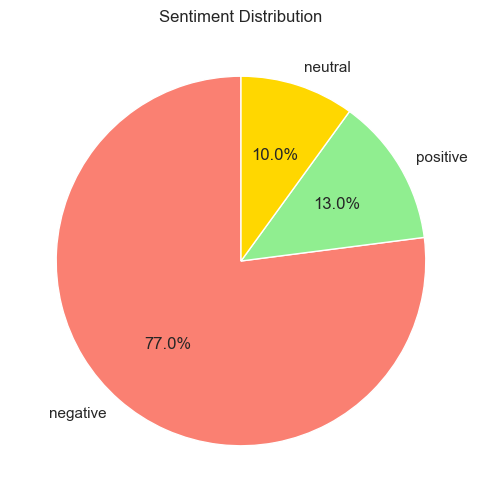

In [25]:
# Pie chart
company['sentiment_label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    colors=['salmon', 'lightgreen', 'gold']
)

plt.ylabel("")
plt.title("Sentiment Distribution")
plt.show()

#### Define negative dataset for further analysis

In [26]:
# Filter only negative sentiment complaints
negative_df = company[
    (company['sentiment_label'] == 'negative') &
    (company['has_complaint'] == 1) &
    (company['date_received'] != '2025-01-17')
]

# Count product frequencies
product_counts = negative_df['product'].value_counts()

# Filter only positive sentiment complaints
positive_df = company[
    (company['sentiment_label'] == 'positive') &
    (company['has_complaint'] == 1) &
    (company['date_received'] != '2025-01-17')
]

In [27]:
row_num = 3   # choose the 6th row
print(positive_df.iloc[row_num]['consumer_complaint_narrative'])

I have been with Capital One for about 5 or so years now. I have had issues where my payment returned due to the timing in which the money came out of my checking account, probably every year except for the promotional year. I have never been late to where as it was reported to the credit bureau. In the past I have made my payments the same day and the credit would be available the same day. And when it was not available the same day, I have called Capital One to have the the credit be available same day, and they would without an issue. Yesterday on XXXX XXXX XXXX XXXX XXXX  or so, I made a payment for {$400.00}, now on the app it provides the Earliest Available Date for the payment or the next day after. The earliest available date for the {$400.00} was XX/XX/XXXX, for the payment to post, and also in that case for the credit to be available. Once a consumer selects the " payment button '' in the app and then selects the date, the options for what days for the payment to be submitted

In [28]:
top3 = (
    negative_df.groupby("product")
                .size()
                .sort_values(ascending=False)
                .head(3)
                .index
                .tolist()
)

negative_prod = negative_df[negative_df["product"].isin(top3)]


In [29]:
top3_all = (
    company.groupby("product")
                .size()
                .sort_values(ascending=False)
                .head(3)
                .index
                .tolist()
)

top_prod = company[company["product"].isin(top3)]


#### Negative Sentiment Complaints by Product with highlighted TOP3

C:\Users\smilesimile\AppData\Local\Temp\ipykernel_22052\2897313998.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




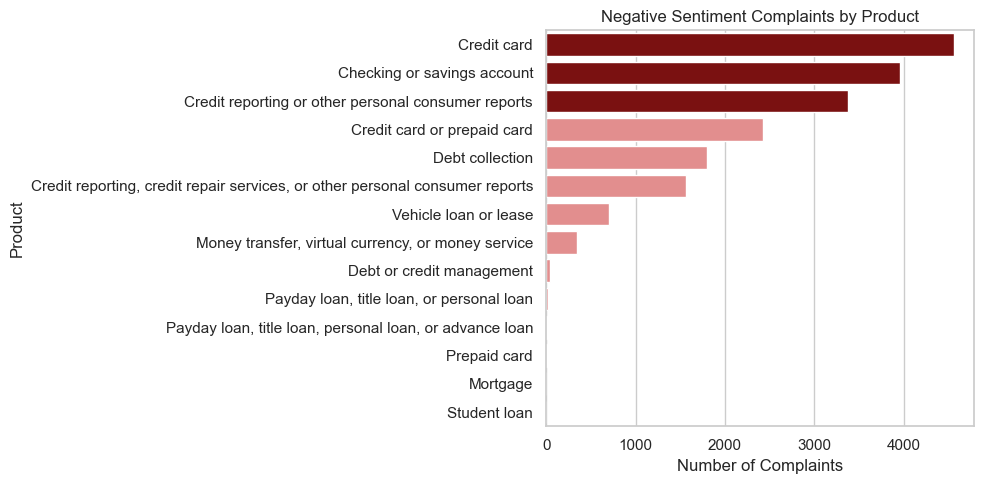

In [30]:
# Create a color list: highlight top 3 in dark red, others in light red
colors = ['darkred' if p in top3 else 'lightcoral' for p in product_counts.index]

plt.figure(figsize=(10,5))

sns.barplot(
    x=product_counts.values,
    y=product_counts.index,
    palette=colors
)

plt.title("Negative Sentiment Complaints by Product")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

#### Selecting top 3 products to report in SubProduct level

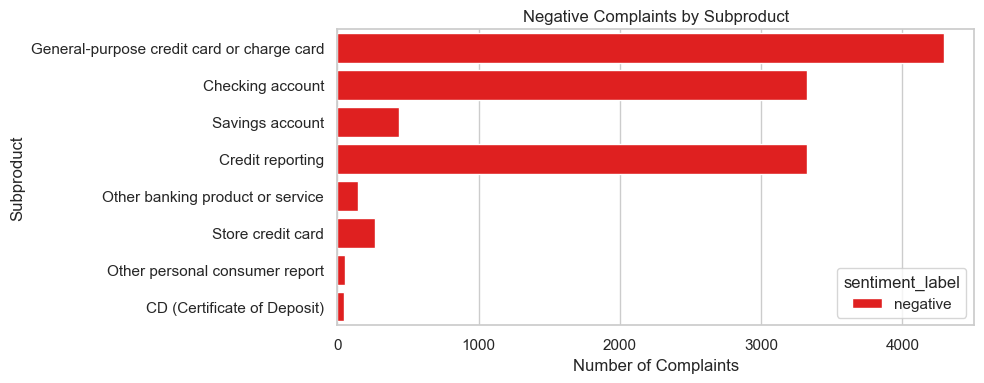

In [31]:
# Define custom palette
sentiment_palette = {
    'negative': 'red',
    'neutral': 'lightgrey',
    'positive': 'blue'  # optional, include only if present in your data
}

plt.figure(figsize=(10,4))

sns.countplot(
    data=negative_prod,
    y='subproduct',
    hue='sentiment_label',
    palette=sentiment_palette,
    orient='h'
)

plt.title("Negative Complaints by Subproduct")
plt.xlabel("Number of Complaints")
plt.ylabel("Subproduct")
plt.tight_layout()
plt.show()

#### Bar Plot depict Top Complaints issue and SubIssue from Negative Sentiment only

Top **issue** is the Managing an account <br>
Top **Subissue** related to;
- Credit card company is not resolving a dispute about a purchase on customer statement; and <br>
- Deposit and withdrawals

C:\Users\smilesimile\AppData\Local\Temp\ipykernel_22052\3640203924.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\smilesimile\AppData\Local\Temp\ipykernel_22052\3640203924.py:72: UserWarning:

Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.



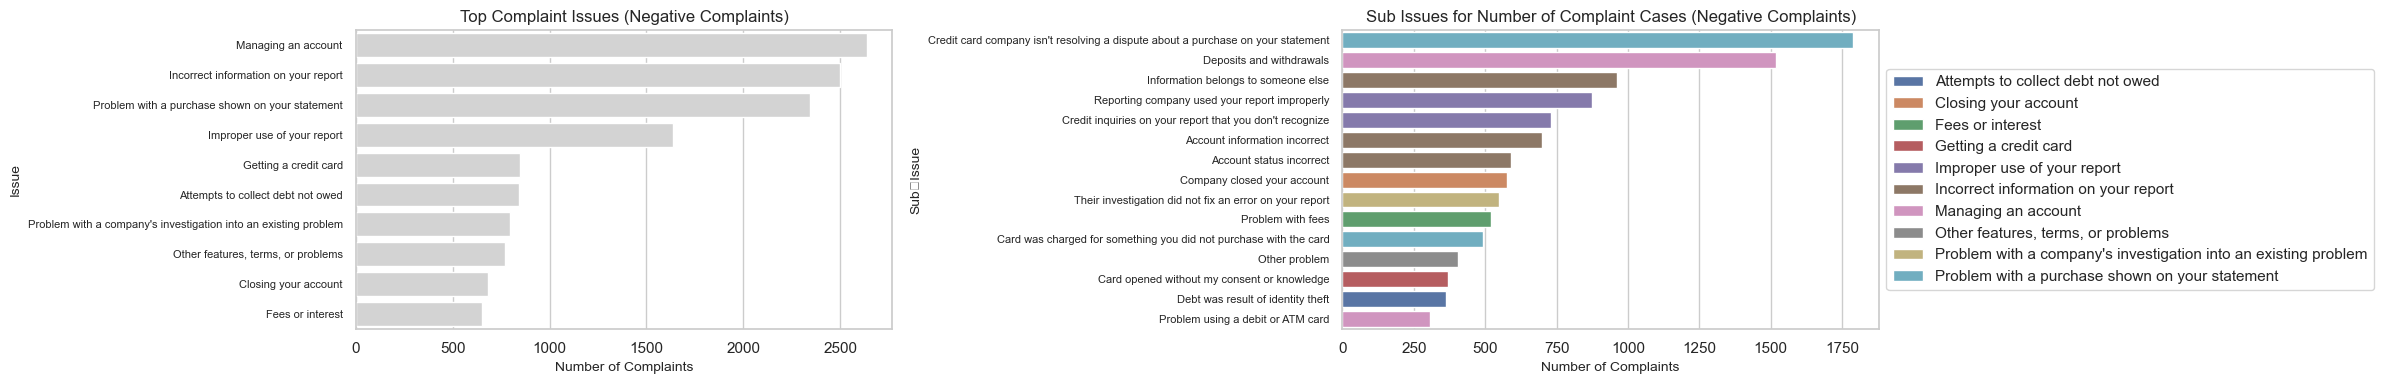

In [32]:
plt.clf
# Count issues among negative credit card complaints
issue_counts = negative_df['issue'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(24, 4))

# -----------------------------
# LEFT PANEL — Issue
# -----------------------------
left_colors = ["red" if v > 10000 else "lightgrey" for v in issue_counts.values]

sns.barplot(
    x=issue_counts.values,
    y=issue_counts.index,
    palette=left_colors,
    ax=axes[0]
)

axes[0].set_title("Top Complaint Issues (Negative Complaints)", fontsize=12)
axes[0].set_xlabel("Number of Complaints", fontsize=10)
axes[0].set_ylabel("Issue", fontsize=10)
axes[0].tick_params(axis='y', labelsize=8)

# -----------------------------
# RIGHT PANEL — SubIssue
# -----------------------------
df_sub = negative_df[negative_df['issue'].isin(issue_counts.index)]

# Group by issue + subissue
subissue_grouped = (
    df_sub.groupby(['issue', 'subissue'])['complaint_id']
          .count()
          .reset_index(name='complaint_count')
)

# Keep only top 15 subissues
top15_subissues = (
    subissue_grouped.groupby('subissue')['complaint_count']
                    .sum()
                    .sort_values(ascending=False)
                    .head(15)
                    .index
)

subissue_grouped = subissue_grouped[subissue_grouped['subissue'].isin(top15_subissues)]

# Order for plotting
subissue_order = top15_subissues

sns.barplot(
    data=subissue_grouped,
    x='complaint_count',
    y='subissue',
    hue='issue',
    order=subissue_order,
    ax=axes[1]
)

# Legend AFTER plotting
legend = axes[1].get_legend()
if legend:
    for text in legend.get_texts():
        text.set_fontsize(7)  # smaller font
    legend.set_title("Issue", prop={'size': 8})  


axes[1].set_title("Sub Issues for Number of Complaint Cases (Negative Complaints)", fontsize=12)
axes[1].set_xlabel("Number of Complaints", fontsize=10)
axes[1].set_ylabel("Sub‑Issue", fontsize=10)
axes[1].tick_params(axis='y', labelsize=8)
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [33]:
temp = company.assign(
    is_negative = company['sentiment_label'].eq('negative')
)

# Group and aggregate into a NEW df
compare = (
    temp.groupby(['product', 'subproduct'])
        .agg(
            total_lines=('product', 'count'),
            negative_lines=('is_negative', 'sum')
        )
        .reset_index()
)

#### Parallel line chart compare negative% with the total complaint lines by product

In [34]:
# --- Prepare data ---
compare_plot = (
    compare.groupby('product')
          .agg(
              total_lines=('total_lines', 'sum'),
              negative_lines=('negative_lines', 'sum')
          )
          .reset_index()
)

# Compute negative rate (%)
compare_plot['negative_rate'] = compare_plot['negative_lines'] / compare_plot['total_lines'] * 100

# Normalize total_lines to percentage of max
compare_plot['total_lines_pct'] = compare_plot['total_lines'] / compare_plot['total_lines'].max() * 100

# Sort by total_lines descending
compare_plot = compare_plot.sort_values('total_lines', ascending=False).reset_index(drop=True)

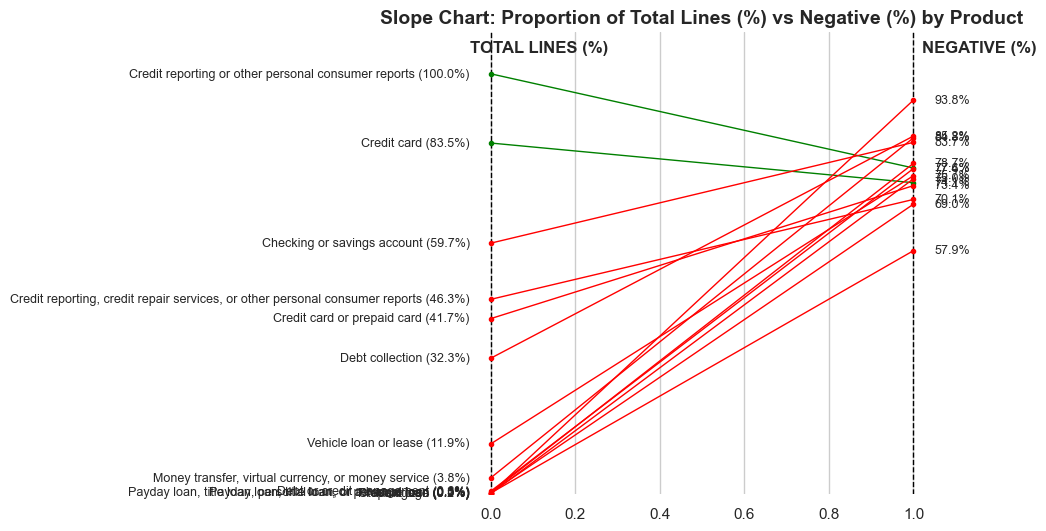

In [35]:
# --- Build slope chart ---
plt.figure(figsize=(6, 6))

# X positions for BEFORE and AFTER
x_positions = [0, 1]

# Add vertical reference lines
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)

# Add BEFORE / AFTER labels
plt.text(-0.05, 105, 'TOTAL LINES (%)', fontsize=12, fontweight='bold')
plt.text(1.02, 105, 'NEGATIVE (%)', fontsize=12, fontweight='bold')

# Plot each product
for _, row in compare_plot.iterrows():
    
    before = row['total_lines_pct']
    after = row['negative_rate']
    product = row['product']
    
    # Color: red if negative rate increased relative to volume, green otherwise
    color = 'red' if after > before else 'green'
    
    # Draw line
    plt.plot(x_positions, [before, after], marker='o', color=color, linewidth=1, markersize=3)
    
    # Add labels
    plt.text(-0.05, before, f"{product} ({before:.1f}%)", ha='right', va='center', fontsize=9)
    plt.text(1.05, after, f"{after:.1f}%", ha='left', va='center', fontsize=9)

# Title
plt.title("Slope Chart: Proportion of Total Lines (%) vs Negative (%) by Product", fontsize=14, fontweight='bold')

# Remove y-axis and frame
plt.yticks([])
plt.box(False)

plt.ylim(0, 110)
plt.show()

## BERTopic
---
Analyze Narrative complaint of customer into topic by focusing on the extreme negative comment

**[Next](#CTFIDF)**

#### Word CountVectorizer

In [36]:
%pip install tf-keras
%pip install bertopic

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import CountVectorizer

Defaulting to user installation because normal site-packages is not writeable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: umap-learn>=0.5.0 in c:\users\smilesimile\appdata\roaming\python\python313\site-packages (from bertopic) (0.5.9.post2)




In [37]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

def generate_topics(
    df,
    text_column,
    clean_fn=None,
    min_df=5,
    model_name="all-MiniLM-L6-v2"
):
    """
    Run BERTopic on any DataFrame safely without modifying the original.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        text_column (str): Column containing text
        clean_fn (callable): Optional cleaning function
        min_df (int): Minimum document frequency for vectorizer
        model_name (str): SentenceTransformer model name
        
    Returns:
        df_out (pd.DataFrame): Copy of df with topic, topic_prob, topic_name
        topic_model (BERTopic): Fitted model
    """

    # Make a copy so original df is untouched
    df_out = df.copy()

    # Extract and clean text
    text_series = (
        df_out[text_column]
        .dropna()
        .astype(str)
    )

    if clean_fn:
        text_series = text_series.apply(clean_fn)

    text_series = text_series.str.strip()
    text_series = text_series[text_series.str.len() > 0]

    texts = text_series.tolist()

    # Build BERTopic components
    vectorizer = CountVectorizer(
        stop_words="english",
        ngram_range=(1, 1),
        min_df=min_df
    )

    embedding_model = SentenceTransformer(model_name)

    topic_model = BERTopic(
        embedding_model=embedding_model,
        vectorizer_model=vectorizer
    )

    # Fit model
    topics, probs = topic_model.fit_transform(texts)

    # Build topic DataFrame
    topic_df = pd.DataFrame(
        {"topic": topics, "topic_prob": probs},
        index=text_series.index
    )

    # Merge safely (no overwrite)
    df_out = df_out.join(topic_df, how="left")

    # Add topic names
    topic_info = topic_model.get_topic_info()
    topic_name_map = dict(zip(topic_info["Topic"], topic_info["Name"]))
    df_out["topic_name"] = df_out["topic"].map(topic_name_map)

    return df_out, topic_model


In [38]:
negative_topics, model = generate_topics(
    negative_df,
    text_column="consumer_complaint_narrative",
    clean_fn=clean_text
)


In [39]:
all_topics, model = generate_topics(
    company,
    text_column="consumer_complaint_narrative",
    clean_fn=clean_text
)


'(ProtocolError('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)), '(Request ID: 23942d39-4fb9-4cad-bcab-b329f320da90)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].


In [40]:
jan17_topics, model17 = generate_topics(
    jan17,
    text_column="consumer_complaint_narrative",
    clean_fn=clean_text
)


'(ProtocolError('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)), '(Request ID: cde90c98-3999-4cc0-a8f7-e6c724a4aafb)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].


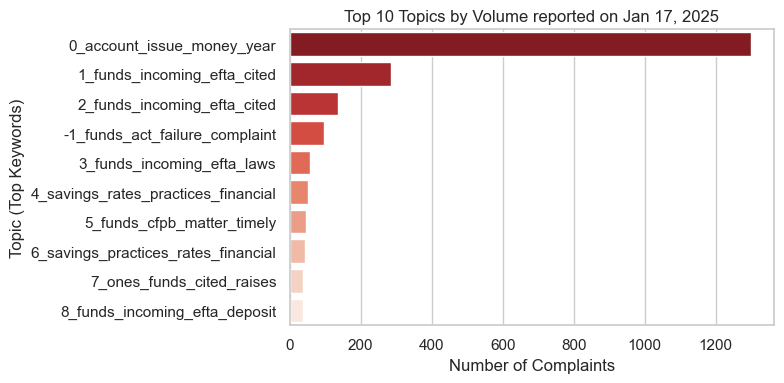

In [41]:


top_10_topics17 = (
    jan17_topics['topic_name']
    .value_counts()
    .reset_index()
)

top_10_topics17.columns = ['Name', 'Count']

# Keep only top 10
top_10_topics17 = top_10_topics17.head(10)
plt.figure(figsize=(8,4))
sns.barplot(
    data=top_10_topics17,
    x="Count",
    y="Name",
    palette="Reds_r"
)

plt.title("Top 10 Topics by Volume reported on Jan 17, 2025")
plt.xlabel("Number of Complaints")
plt.ylabel("Topic (Top Keywords)")
plt.tight_layout()
plt.show()


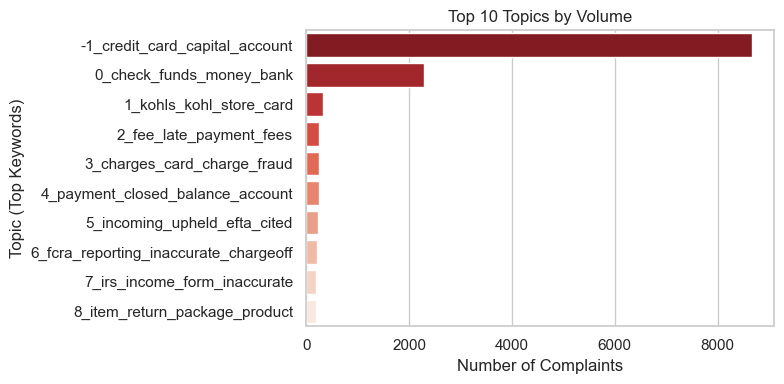

In [42]:
top_10_topics = (
    negative_topics['topic_name']
    .value_counts()
    .reset_index()
)

top_10_topics.columns = ['Name', 'Count']

# Keep only top 10
top_10_topics = top_10_topics.head(10)
plt.figure(figsize=(8,4))
sns.barplot(
    data=top_10_topics,
    x="Count",
    y="Name",
    palette="Reds_r"
)

plt.title("Top 10 Topics by Volume")
plt.xlabel("Number of Complaints")
plt.ylabel("Topic (Top Keywords)")
plt.tight_layout()
plt.show()


#### Intertopic Distance Map
Topics that appear the distant is close together share similar topic

In [44]:
vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 1),
    min_df=5
)

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=vectorizer
)

In [45]:
texts_neg = negative_df['consumer_complaint_narrative'].dropna().tolist()
texts_neg = [clean_text(t) for t in texts_neg]
topics, probs = topic_model.fit_transform(texts_neg)

In [46]:
negative_topics.head()

date_received                                            product  \
689      2025-09-24                                        Credit card   
3834     2025-09-05                        Checking or savings account   
5740     2024-01-14                        Checking or savings account   
13374    2025-09-17                                        Credit card   
13502    2025-07-23  Money transfer, virtual currency, or money ser...   

                                       subproduct  \
689    General-purpose credit card or charge card   
3834                             Checking account   
5740                              Savings account   
13374  General-purpose credit card or charge card   
13502                            Virtual currency   

                                                 issue  \
689    Problem with a purchase shown on your statement   
3834                                Closing an account   
5740                                Closing an account   
13374                      Struggling to pay your bill   
13502                                    Fraud or scam   

                                                subissue  \
689    Credit card company isn't resolving a dispute ...   
3834                            Can't close your account   
5740              Funds not received from closed account   
13374  Credit card company won't work with you while ...   
13502                                                NaN   

                            consumer_complaint_narrative  \
689    To Whom It May Concern, I am filing this compl...   
3834   I am filing a complaint against Capital One Ba...   
5740   Hello, My checking and savings accounts with C...   
13374  Re : Complaint Against Capital One Bank Credit...   
13502  This is regarding Claim XXXX XXXXXXXX, a dispu...   

      company_public_response                            company state  \
689                       NaN  CAPITAL ONE FINANCIAL CORPORATION    CA   
3834                      NaN  CAPITAL ONE FINANCIAL CORPORATION    AZ   
5740                      NaN  CAPITAL ONE FINANCIAL CORPORATION    NY   
13374                     NaN  CAPITAL ONE FINANCIAL CORPORATION    CA   
13502                     NaN  CAPITAL ONE FINANCIAL CORPORATION    UT   

      zip_code  ... consumer_disputed complaint_id has_complaint case_status  \
689      92612  ...               NaN     16150622             1     pending   
3834     85022  ...               NaN     15752591             1     pending   
5740     10024  ...               NaN      8155328             1     pending   
13374    92078  ...               NaN     15994125             1     pending   
13502    84721  ...               NaN     14837464             1     pending   

                                         clean_narrative sentiment_score  \
689    to whom it may concern i am filing this compla...         -0.9847   
3834   i am filing a complaint against capital one ba...         -0.8114   
5740   hello my checking and savings accounts with ca...         -0.9328   
13374  re  complaint against capital one bank credit ...         -0.9638   
13502  this is regarding claim   a dispute i filed wi...         -0.9945   

      sentiment_label  topic  topic_prob                      topic_name  
689          negative   -1.0    0.000000  -1_credit_card_capital_account  
3834         negative    0.0    0.925353        0_check_funds_money_bank  
5740         negative    0.0    1.000000        0_check_funds_money_bank  
13374        negative   -1.0    0.000000  -1_credit_card_capital_account  
13502        negative    3.0    0.983272     3_charges_card_charge_fraud  

[5 rows x 26 columns]

In [47]:
topic_model.visualize_topics()

#### Hierarchical Clustering function
visualize_hierarchy() depicts similar to distance map but 
reports in the Hierarchical graph

In [48]:
fig = topic_model.visualize_hierarchy()
fig.show()

## CTFIDF
---
Getting Cluster group

**[Next](#LLMs)**

In [49]:
from scipy.cluster.hierarchy import linkage, fcluster

# 1. Extract c-TF-IDF matrix (this is what hierarchy uses)
ctfidf = topic_model.c_tf_idf_

# 2. Compute Ward linkage (same as BERTopic)
Z = linkage(ctfidf.toarray(), method="ward")

# 3. Cut the dendrogram at the same threshold used in visualize_hierarchy()
clusters = fcluster(Z, t=0.8, criterion='distance')

# 4. Build DataFrame
topic_ids = topic_model.get_topic_info()['Topic'].tolist()

cluster_df = pd.DataFrame({
    'topic_id': topic_ids,
    'hierarchy_cluster': clusters
})

# 5. Add topic keywords
topic_info = topic_model.get_topic_info()[['Topic','Name']]
cluster_df = cluster_df.merge(topic_info, left_on='topic_id', right_on='Topic').drop(columns=['Topic'])

In [50]:
hierarchy_cluster_map = dict(zip(cluster_df['topic_id'], cluster_df['hierarchy_cluster']))

In [51]:
negative_topics['hierarchy_cluster'] = negative_topics['topic'].map(hierarchy_cluster_map).fillna(-1)

In [52]:
topic_keywords = dict(zip(cluster_df['topic_id'], cluster_df['Name']))

### UMAP
---

Visualize clustering from the negative complaint dataset

In [53]:
from umap import UMAP
import plotly.express as px

# Use the original embedding_model for encoding
embeddings = embedding_model.encode(negative_topics['clean_narrative'].dropna().tolist(), show_progress_bar=True)

# Reduce to 3D with UMAP
umap_model = UMAP(n_components=3, random_state=42)
embeddings_3d = umap_model.fit_transform(embeddings)

# Build DataFrame
df_3d = pd.DataFrame(embeddings_3d, columns=['x','y','z'])
df_3d['topic'] = negative_topics.loc[negative_topics['clean_narrative'].notna(), 'topic'].values
df_3d['topic_label'] = df_3d['topic'].apply(lambda t: topic_keywords.get(t, "Unknown"))
df_3d['hierarchy_cluster'] = df_3d['topic'].map(hierarchy_cluster_map).fillna(-1)
df_3d['cluster_label'] = df_3d['hierarchy_cluster'].apply(lambda c: f"Cluster {c}")

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

In [54]:
fig = px.scatter_3d(
    df_3d,
    x='x', y='y', z='z',
    color='cluster_label',
    hover_data={
        'topic': True,
        'topic_label': True,
        'hierarchy_cluster': True
    },
    title="3D UMAP — Hierarchy Extremely Negative Clusters with Topic Details",
    opacity=0.7
)

fig.update_traces(marker=dict(size=3))
fig.show()

### Focus on Compliance-related Topic
---
Finding the closest topic with the compliance wording and phrase <br>
Extract top 5 related topic where most of the SubProduct falls under 
>- **Savings account** and
>- **General-purpse credit card or charge card** and
>- **Credit reporting**

In [55]:
from sentence_transformers import SentenceTransformer, util


# Define query to identify the topic related to the compliant
compliance_query = "regulatory compliance issues, legal violations, unauthorized activity"

# Embed the query
query_emb = embedding_model.encode(compliance_query)

# Get topic embeddings from BERTopic
topic_embeddings = topic_model.topic_embeddings_

# Compute similarity
scores = util.cos_sim(query_emb, topic_embeddings)[0].cpu().numpy()

# Get top 5 most related topics
top_related = np.argsort(scores)[::-1][:5]
top_related

array([ 30,  81, 124,  95,  14])

In [56]:
topic_model.get_topic_info().loc[top_related]


Topic  Count                                           Name  \
30      29     81                  29_section_usc_states_furnish   
81      80     28         80_eercise_consumer_institution_states   
124    123     15     123_permissible_purpose_consumer_liability   
95      94     22  94_inquiry_inquiries_unauthorized_permissible   
14      13    139            13_inquiries_inquiry_hard_authorize   

                                        Representation  \
30   [section, usc, states, furnish, privacy, agenc...   
81   [eercise, consumer, institution, states, agenc...   
124  [permissible, purpose, consumer, liability, ag...   
95   [inquiry, inquiries, unauthorized, permissible...   
14   [inquiries, inquiry, hard, authorize, inquires...   

                                   Representative_Docs  
30   [in accordance with the fair credit reporting ...  
81   [fair credit reporting act  usc  section   a  ...  
124  [            capital one auto finance       no...  
95   [         cap one via dealer  capit one       ...  
14   [unauthorized hard inquiries from \n\n        ...

In [57]:
all_topics = all_topics[all_topics["product"].isin(top3_all)]

In [58]:
all_topics['topic_label'] = all_topics['topic'].map(topic_keywords)

In [59]:
all_topics['topic_label'] = all_topics['topic'].apply(
    lambda t: f"{topic_keywords.get(t, 'Unknown')} (Cluster {hierarchy_cluster_map.get(t, -1)})"
)

In [60]:
(all_topics['date_received'] == '2025-01-17').any()


np.True_

In [61]:
compliance_topics = list(top_related)

df_compliance = all_topics[all_topics['topic'].isin(compliance_topics)]

In [62]:
df_compliance['topic'].value_counts()

topic
14.0     250
30.0      68
81.0      40
124.0     22
95.0      10
Name: count, dtype: int64

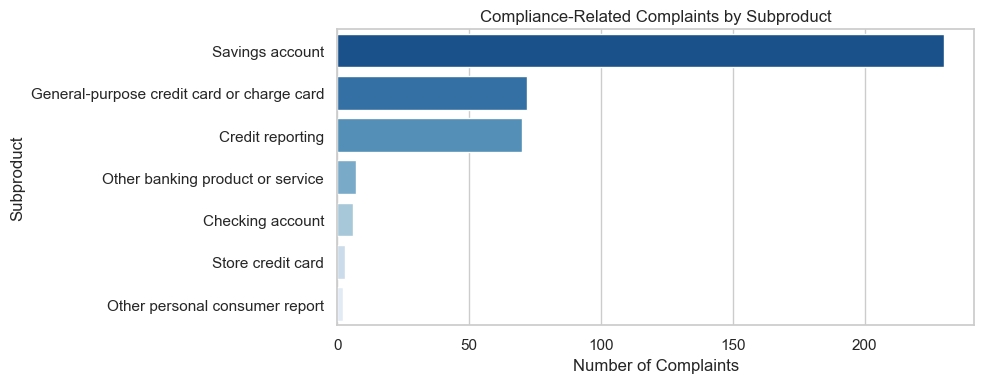

In [63]:
subproduct_counts = df_compliance['subproduct'].value_counts()

subproduct_df = subproduct_counts.reset_index()
subproduct_df.columns = ['subproduct', 'count']

plt.figure(figsize=(10,4))
sns.barplot(
    data=subproduct_df,
    x='count',
    y='subproduct',
    palette='Blues_r'
)

plt.title("Compliance-Related Complaints by Subproduct")
plt.xlabel("Number of Complaints")
plt.ylabel("Subproduct")
plt.tight_layout()
plt.show()


#### Visualize Complaint Volume by issue and top10 topics
- Highest complaint volumn product from the top topic is **Problem with purchase on your statement**

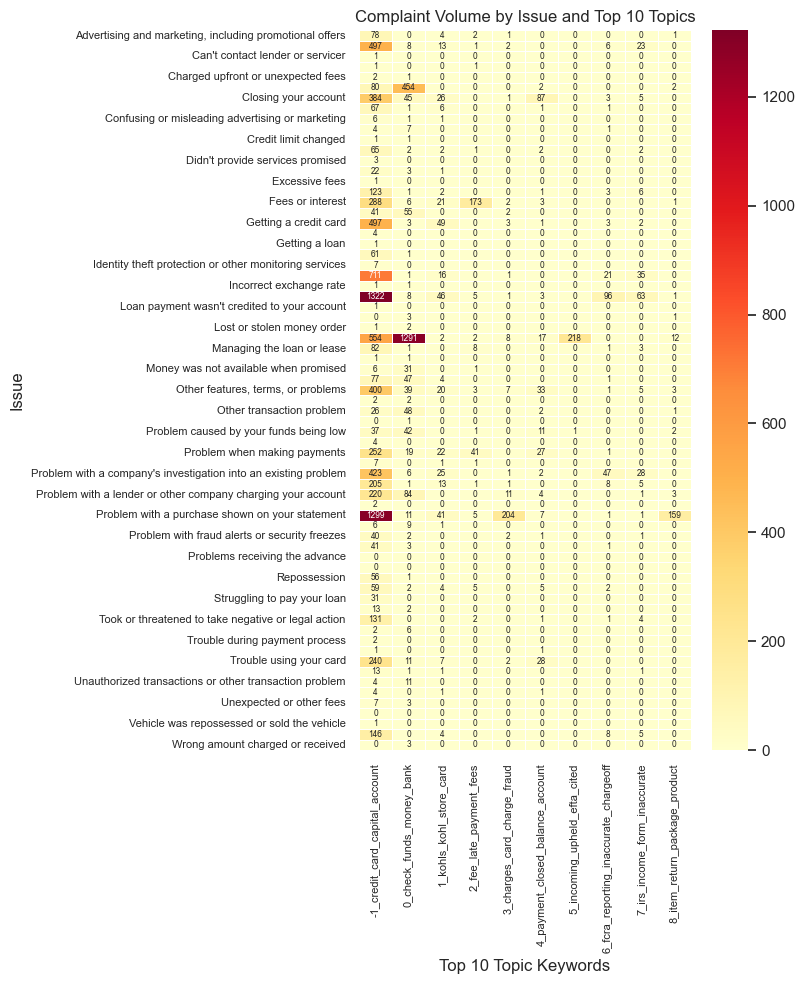

In [64]:
# Create pivot table
heatmap_data = negative_topics.pivot_table(
    index='issue',
    columns='topic_name',
    aggfunc='size',
    fill_value=0
)

# Find top 10 topic_labels by total complaints
top10_heatmap = heatmap_data.sum().sort_values(ascending=False).head(10).index


# Filter heatmap_data to only those columns
top10_heatmap_df = heatmap_data[top10_heatmap]

# Sort the selected columns by total volume again
top10_heatmap_df = top10_heatmap_df.loc[:, top10_heatmap_df.sum().sort_values(ascending=False).index]


# Plot heatmap
plt.figure(figsize=(8,10))
sns.heatmap(
    top10_heatmap_df,
    cmap="YlOrRd",
    linewidths=0.5,
    annot=True,
    fmt="d",
    annot_kws={"size": 6}
)

plt.title("Complaint Volume by Issue and Top 10 Topics")
plt.xlabel("Top 10 Topic Keywords")
plt.ylabel("Issue")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

## LLMs
---

- Analyze **[Compliance](#Compliant-Topic-Summary)** concerned case to meet laws and regulations policy
- Interpret and generate the **[Insight](#INSIGHT-GENERATION)**

[Next](#INSIGHT)

In [65]:
groqfilename = r'C:/Users/smilesimile/Downloads/DATA-20250820T135424Z-1-001/DATA/groq_key.txt' # this file contains a single line containing your Groq API key only
try:
    with open(groqfilename, 'r') as f:
        groq_key = f.read().strip()
except FileNotFoundError:
    print(f"'{groqfilename}' file not found")

In [66]:
%pip install groq

Defaulting to user installation because normal site-packages is not writeable



In [67]:
from groq import Groq
import requests
import pandas as pd
from IPython.display import Markdown

In [69]:
client = Groq(api_key=groq_key)

In [70]:
url = "https://api.groq.com/openai/v1/models"

headers = {
    "Authorization": f"Bearer {groq_key}",
    "Content-Type": "application/json"
}

response = requests.get(url, headers=headers)

pd.DataFrame(response.json()['data']).sort_values(['created'], ascending=False)

id object     created  \
11                  canopylabs/orpheus-v1-english  model  1766186316   
10                canopylabs/orpheus-arabic-saudi  model  1765926439   
14                   openai/gpt-oss-safeguard-20b  model  1761708789   
15               moonshotai/kimi-k2-instruct-0905  model  1757046093   
16                             groq/compound-mini  model  1756949707   
3                                   groq/compound  model  1756949530   
8                             openai/gpt-oss-120b  model  1754408224   
2                              openai/gpt-oss-20b  model  1754407957   
13                    moonshotai/kimi-k2-instruct  model  1752435491   
12            meta-llama/llama-prompt-guard-2-86m  model  1748632165   
7             meta-llama/llama-prompt-guard-2-22m  model  1748632101   
19                                 qwen/qwen3-32b  model  1748396646   
17                   meta-llama/llama-guard-4-12b  model  1746743847   
18  meta-llama/llama-4-maverick-17b-128e-instruct  model  1743877158   
5       meta-llama/llama-4-scout-17b-16e-instruct  model  1743874824   
0                                      allam-2-7b  model  1737672203   
9                         llama-3.3-70b-versatile  model  1733447754   
4                          whisper-large-v3-turbo  model  1728413088   
1                                whisper-large-v3  model  1693721698   
6                            llama-3.1-8b-instant  model  1693721698   

         owned_by  active  context_window public_apps  max_completion_tokens  
11    Canopy Labs    True            4000        None                  50000  
10    Canopy Labs    True            4000        None                  50000  
14         OpenAI    True          131072        None                  65536  
15    Moonshot AI    True          262144        None                  16384  
16           Groq    True          131072        None                   8192  
3            Groq    True          131072        None                   8192  
8          OpenAI    True          131072        None                  65536  
2          OpenAI    True          131072        None                  65536  
13    Moonshot AI    True          131072        None                  16384  
12           Meta    True             512        None                    512  
7            Meta    True             512        None                    512  
19  Alibaba Cloud    True          131072        None                  40960  
17           Meta    True          131072        None                   1024  
18           Meta    True          131072        None                   8192  
5            Meta    True          131072        None                   8192  
0           SDAIA    True            4096        None                   4096  
9            Meta    True          131072        None                  32768  
4          OpenAI    True             448        None                    448  
1          OpenAI    True             448        None                    448  
6            Meta    True          131072        None                 131072

In [71]:
def summarize_text(text):
    response = client.chat.completions.create(
        model="llama-3.1-8b-instant",
        messages=[
            {
                "role": "user",
                "content": (
                    "Summarize this consumer complaint in 1–2 sentences. "
                    "Do NOT include any introductory phrases like 'Here is a summary' or 'The complaint says'. "
                    "If unable to summarize, put as null"
                    "Return ONLY the summary itself:\n\n"
                    f"{text}"
                )
            }
        ]
    )
    return response.choices[0].message.content.strip()


In [72]:
df_compliance["clean_narrative"].shape

(390,)

In [73]:
# Sample rows
sample_comp = df_compliance.sample(n=50, random_state=42).index

# Summarize only those rows
df_compliance.loc[sample_comp, "short_summary"] = (
    df_compliance.loc[sample_comp, "clean_narrative"]
    .astype(str)
    .apply(summarize_text)
)


In [74]:
import nltk
from nltk.tokenize import sent_tokenize

all_text = " ".join(df_compliance["short_summary"].astype(str))
sentences = sent_tokenize(all_text)

# pick first 3 meaningful sentences
quick_summary = " ".join(sentences[:3])
print(quick_summary)

Capital One's customer claims their performance savings account was downgraded without notification, with their long-standing savings account interest rates being lowered to match the children's savings rate, resulting in significantly less interest. The customer feels that Capital One is taking advantage of paying customers. nan nan nan nan nan nan nan nan The consumer refers to their experience with Capital One, where they provided a referral link and helped complete an application in person, but only received mileage credit for one of the approvals.


In [77]:
# Join all short summaries into one long text
all_text = " ".join(df_compliance["short_summary"].astype(str))

# Summarize the combined text
final_summary = summarize_text(all_text)

print(final_summary)

A customer claims Capital One downgraded their savings account interest rate to match the children's savings rate without notification, resulting in significantly less interest earned, and alleges the bank took advantage of paying customers.


In [78]:
def summarize_cluster_texts(texts, model="llama-3.1-8b-instant"):
    """Summarize a list of complaint narratives into 1 sentence."""
    combined = "\n\n".join(texts)

    prompt = (
        "Summarize the following consumer complaint narratives into 1 sentence, "
        "capturing the main issue:\n\n"
        f"{combined}"
    )

    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content.strip()


In [79]:
topic_counts = df_compliance['topic'].value_counts()

# Precompute topic × product counts
topic_product_counts = (
    df_compliance.groupby(['topic', 'product'])['complaint_id']
                 .count()
                 .reset_index(name='complaint_count')
)

for topic_id in topic_counts.index:
    keywords = topic_model.get_topic(int(topic_id))
    
    if keywords:
        top_words = ", ".join([word for word, _ in keywords[:5]])
        print(f"\nTopic {topic_id} ({topic_counts[topic_id]} complaints): {top_words}")
        
        # Filter product counts for this topic
        df_tp = topic_product_counts[topic_product_counts['topic'] == topic_id]
        
        # Sort descending
        df_tp = df_tp.sort_values('complaint_count', ascending=False)
        
        # Print product breakdown
        for _, row in df_tp.iterrows():
            print(f"   - {row['product']}: {row['complaint_count']} complaints")



Topic 14.0 (250 complaints): late, payments, payment, shocked, days
   - Checking or savings account: 242 complaints
   - Credit card: 8 complaints

Topic 30.0 (68 complaints): rental, car, vehicle, rented, damage
   - Credit card: 52 complaints
   - Credit reporting or other personal consumer reports: 15 complaints
   - Checking or savings account: 1 complaints

Topic 81.0 (40 complaints): result, section, related, falls, eclusion
   - Credit reporting or other personal consumer reports: 29 complaints
   - Credit card: 11 complaints

Topic 124.0 (22 complaints): promotional, rate, offer, balance, apr
   - Credit reporting or other personal consumer reports: 18 complaints
   - Credit card: 4 complaints

Topic 95.0 (10 complaints): bank, money, hacked, phone, claim
   - Credit reporting or other personal consumer reports: 10 complaints


In [80]:
def get_top_words(texts, top_n=20):
    # Step 1: Clean each text using your clean_text()
    cleaned_texts = [clean_text(t) for t in texts]

    # Step 2: Combine into one big string
    all_text = " ".join(cleaned_texts)

    # Step 3: Tokenize
    words = all_text.split()

    # Step 4: Filter using your is_clean_word()
    words = [w for w in words if is_clean_word(w)]

    # Step 5: Count and return top-N
    counts = Counter(words)
    top_words = [w for w, _ in counts.most_common(top_n)]

    return top_words

In [81]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud_from_texts(texts, min_freq=15):
    # 1. Clean text
    texts = [clean_text(t) for t in texts]

    # 2. Build vocabulary
    tokenizer = CountVectorizer().build_tokenizer()
    vocab_counter = {}

    for doc in texts:
        for token in tokenizer(doc):
            vocab_counter[token] = vocab_counter.get(token, 0) + 1

    vocab = [word for word, freq in vocab_counter.items()
             if freq >= min_freq and is_clean_word(word)]

    if len(vocab) == 0:
        print("No valid vocabulary for this dataset.")
        return

    # 3. Vectorize
    vectorizer = CountVectorizer(vocabulary=vocab, stop_words='english')
    X = vectorizer.fit_transform(texts)

    # 4. Word frequencies
    word_freq = np.asarray(X.sum(axis=0)).ravel()
    words = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(words, word_freq))

    # 5. Top 200 words
    sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    top200_words = [word for word, freq in sorted_freq[:200]]

    # 6. Custom stopwords
    custom_stopwords = STOPWORDS.union(set(top200_words)).union({
        'told','did','called','said','received','sent','account','consumer',
        'report','reporting','company','date','information','provide','email',
        'opened','number','he','she','they','mr','mrs','xxxx'
    })

    # 7. Word cloud
    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        background_color="white",
        max_words=200,
        width=800,
        height=400
    ).generate_from_frequencies(freq_dict)

    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Summarize Cluster for top negative complaint product

In [97]:
def summarize_cluster_from_keywords(keywords, model="llama-3.1-8b-instant"):
    prompt = (
        "Using ONLY the following keywords, write 1 sentence summarizing the main issue, Result should have no special character only the wording or phrase "
        "these consumer complaints are about:\n\n"
        f"{', '.join(keywords)}"
    )

    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content.strip()

In [98]:
topic_counts = df_compliance['topic'].value_counts()

topic_summaries = []   # <-- store summaries here

for topic_id in topic_counts.index:
    # Get all documents for this topic
    topic_docs = (
        df_compliance[df_compliance['topic'] == topic_id]['consumer_complaint_narrative']
        .dropna()
        .tolist()
    )

    total_docs = len(topic_docs)
    print(f"\n===== Topic {topic_id} | {total_docs} complaints =====")

    if total_docs == 0:
        print("No documents in this topic.")
        topic_summaries.append((topic_id, "No documents in this topic."))
        continue

    # Extract top 20 words from the documents
    top_words = get_top_words(topic_docs, top_n=20)

    # Summarize topic using your keyword-based summarizer
    topic_summary = summarize_cluster_from_keywords(top_words)

    print(f"Summary: {topic_summary}\n")

    # Save summary for later use
    topic_summaries.append((topic_id, topic_summary))



===== Topic 14.0 | 250 complaints =====
Summary: This savings account had not new rates for one that was with the interest rate on their savings accounts with a change in rate.


===== Topic 30.0 | 68 complaints =====
Summary: They denied the application for one card due to not having a sufficient credit score.


===== Topic 81.0 | 40 complaints =====
Summary: Consumer complains that US Consumer Financial Protection Bureau does not provide sufficient financial information and one cannot opt out of personal financial reporting.


===== Topic 124.0 | 22 complaints =====
Summary: The company never was reporting the charged credit report has off balance and they are not reporting for this account.


===== Topic 95.0 | 10 complaints =====
Summary: Consumer reports have not been written to accurately report the credit account section in the US Consumer Financial Protection Act without fair reporting rights.



# INSIGHT
---
[Home](#CAPITAL-ONE-FINANCIAL-CORPORATION)
- Interpret main narrative complaint related to the compliance concerns
- Cluster has the highest complaint volume which relates to **the consumer complaints are about credit card payments**.
- Interactive map and bar chart by state for state level insight via [Gradio](#Gradio)

[Next](#STRATEGIC-RECOMMENDATION)

## Compliant Topic Summary
---



In [84]:
# Convert topic summaries into plain text list
batch_summaries = [summary for _, summary in topic_summaries]

# Join into one string
final_input = "\n".join(batch_summaries)

# Send to model
final_response = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
        {
            "role": "user",
            "content": (
                "Summarize all of these complaint summaries to identify the main issues in bullet point:\n\n"
                f"{final_input}"
            )
        }
    ]
)

# Extract and print
final_summary = final_response.choices[0].message.content
print(final_summary)


Based on the complaint summaries, here are the main issues identified in bullet points:

* Lack of rate changes or updates
* Denial of credit card applications without sufficient reason
* Inaccurate or excessive consumer information reporting to credit bureaus
* Errors in credit balance reporting that result in charges
* Failure of a consumer agency (USC) to follow written instructions.


## Summarize narrative complaint from top cluster
---
Cluster2 has the highest complaint volume which relates to the consumer complaints are about credit card payments.

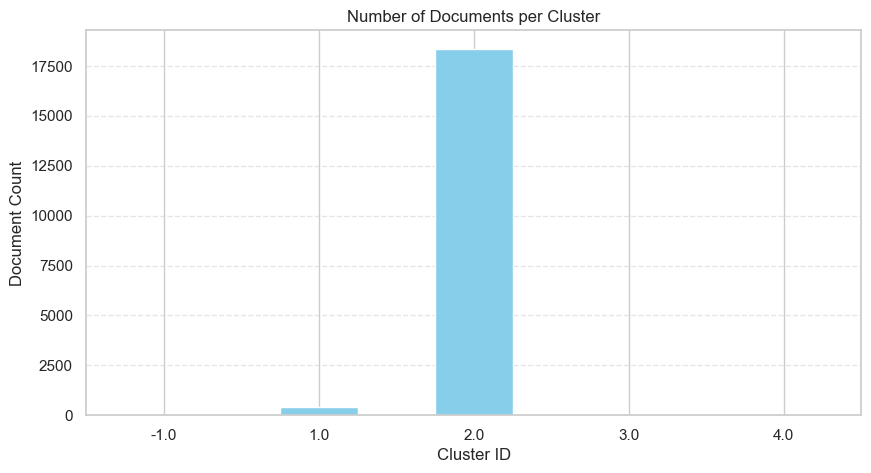

In [85]:
df_3d['orig_index'] = negative_df.index

cluster_sizes = (
    df_3d.groupby('hierarchy_cluster')['orig_index']
    .count()
    .sort_index()
)

plt.figure(figsize=(10, 5))
cluster_sizes.plot(kind='bar', color='skyblue')

plt.title("Number of Documents per Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Document Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


===== Cluster -1.0 | 2 documents =====
Summary: You haven't given the keywords yet. Please provide them so I can assist you.

No valid vocabulary for this dataset.

===== Cluster 1.0 | 405 documents =====
Summary: This consumer complaint is about they have not been reported for one debt or credit account that you have with capital.



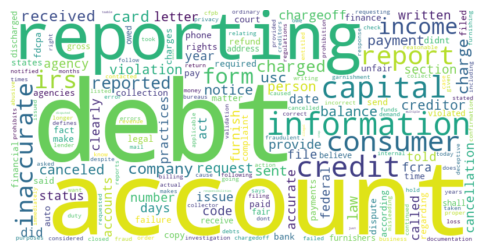


===== Cluster 2.0 | 18369 documents =====
Summary: They had with that one account any information for this from credit card not.



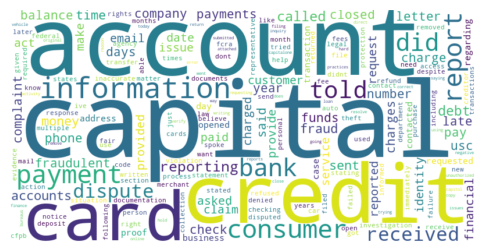


===== Cluster 3.0 | 20 documents =====
Summary: You must provide full and accurate disclosure also of possible delinquency under USC that first have a match to the profile.



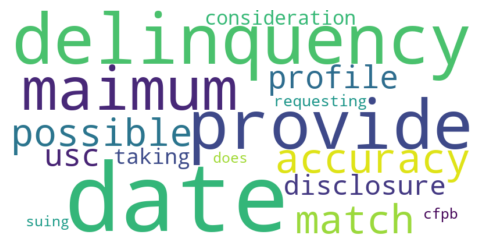


===== Cluster 4.0 | 24 documents =====
Summary: One consumer had a dispute that was from this concert ticket.



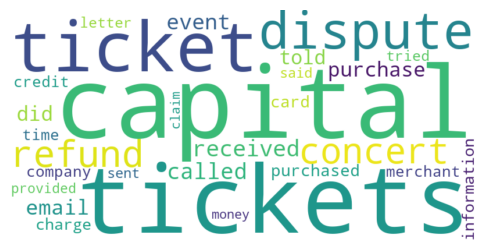

In [99]:
for cluster_id in sorted(df_3d['hierarchy_cluster'].unique()):
    cluster_indices = df_3d[df_3d['hierarchy_cluster'] == cluster_id]['orig_index']
    cluster_docs = (
        negative_df.loc[cluster_indices, 'clean_narrative']
        .dropna()
        .tolist()
    )

    total_docs = len(cluster_docs)
    print(f"\n===== Cluster {cluster_id} | {total_docs} documents =====")

    if total_docs == 0:
        print("No documents in this cluster.")
        continue

    # Extract top 20 words
    top_words = get_top_words(cluster_docs, top_n=20)

    # Summarize cluster using only keywords
    cluster_summary = summarize_cluster_from_keywords(top_words)

    print(f"Summary: {cluster_summary}\n")

    generate_wordcloud_from_texts(cluster_docs, min_freq=15)

## Gradio
---
Apply with Gradio for interactive map with product and topic
- California has highest complaint volume compare to overall states


In [87]:
%pip install gradio


Defaulting to user installation because normal site-packages is not writeable



In [88]:
import plotly.express as px
import gradio as gr

Plotmap

In [100]:
# Identify Top 10 topics overall
top10_topics = (
    negative_topics['topic']
    .value_counts()
    .head(10)
    .index
    .tolist()
)

# Filter dataset to only those topics
negative_prod_top10 = negative_topics[negative_topics['topic'].isin(top10_topics)]

# Build summarized topic labels ONLY for Top 10 topics
topic_labels = {
    topic_id: summarize_cluster_from_keywords(topic_keywords[topic_id])
    for topic_id in top10_topics
}


In [101]:
negative_topics['topic'] = (
    negative_topics['topic']
    .fillna(-1)
    .astype(int)
)


# Existing topic/product counts
topic_product_counts = (
    negative_prod_top10.groupby(['state','topic','product'])['complaint_id']
    .count()
    .reset_index()
    .sort_values(['state','complaint_id'], ascending=[True, False])
)

# NEW: Map topic labels back into the dataframe
topic_product_counts['topic_label'] = topic_product_counts['topic'].map(topic_labels)

negative_topics['topic'] = negative_topics['topic'].astype(int)  # ensure type matches
negative_topics['topic_label'] = negative_topics['topic'].map(topic_labels).fillna("Unknown")

In [102]:
state_topic_counts = (
    negative_topics
    .groupby(['state', 'topic_label', 'product'])
    .size()
    .reset_index(name='line_count')
    .sort_values(['state', 'line_count'], ascending=[True, False])
)

In [103]:
state_topic_counts

state                                        topic_label  \
2       AE                                            Unknown   
3       AE                                            Unknown   
0       AE  Consumer issues include account problems, cred...   
1       AE   Hotel complaints are mainly about travel issues.   
4       AE                                            Unknown   
...    ...                                                ...   
1579    WY  Consumer issues include account problems, cred...   
1581    WY  Merchants rant about refund, return, and remed...   
1582    WY                                            Unknown   
1584    WY                                            Unknown   
1585    WY                                            Unknown   

                                                product  line_count  
2                                           Credit card           2  
3                           Credit card or prepaid card           2  
0                                           Credit card           1  
1                                           Credit card           1  
4                                       Debt collection           1  
...                                                 ...         ...  
1579                              Vehicle loan or lease           1  
1581  Money transfer, virtual currency, or money ser...           1  
1582                        Checking or savings account           1  
1584                        Credit card or prepaid card           1  
1585                                    Debt collection           1  

[1586 rows x 4 columns]

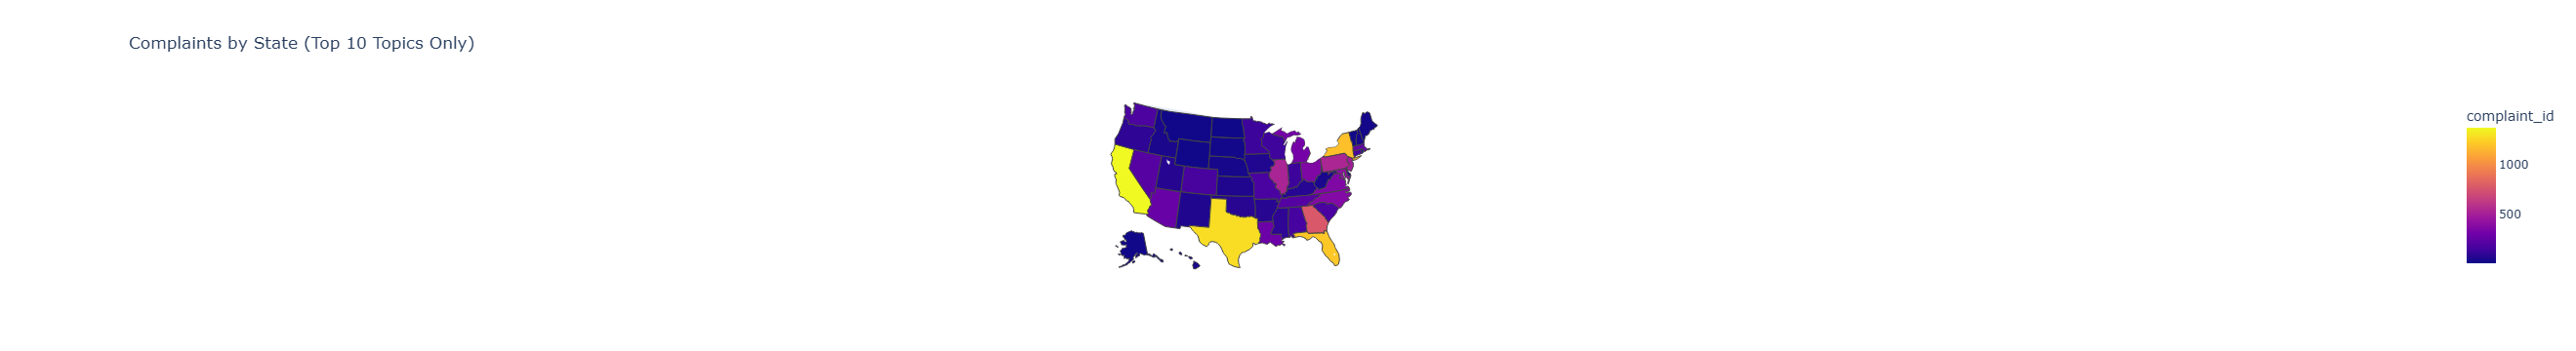

In [104]:
# Complaint counts per state
state_counts = negative_prod_top10.groupby('state')['complaint_id'].count().reset_index()

# Top sub-issue per state
top_subissues = (
    negative_prod_top10.groupby(['state','subissue'])['complaint_id']
    .count()
    .reset_index()
    .sort_values(['state','complaint_id'], ascending=[True, False])
    .groupby('state')
    .first()
    .reset_index()
)
top_subissues.rename(columns={
    'subissue': 'top_subissue',
    'complaint_id': 'top_subissue_count'
}, inplace=True)

# Top topic per state (numeric)
top_topics = (
    negative_prod_top10.groupby(['state','topic'])['complaint_id']
    .count()
    .reset_index()
    .sort_values(['state','complaint_id'], ascending=[True, False])
    .groupby('state')
    .first()
    .reset_index()
)

# Replace numeric topic with summarized label
top_topics['top_topic'] = top_topics['topic'].apply(lambda t: topic_labels.get(int(t), "Unknown"))
top_topics.rename(columns={'complaint_id': 'top_topic_count'}, inplace=True)

# Merge everything
state_counts = (
    state_counts
    .merge(top_subissues[['state','top_subissue','top_subissue_count']], on='state', how='left')
    .merge(top_topics[['state','top_topic','top_topic_count']], on='state', how='left')
)

# Choropleth map
fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode='USA-states',
    color='complaint_id',
    scope='usa',
    title="Complaints by State (Top 10 Topics Only)",
    hover_data={
        'top_subissue': True,
        'top_subissue_count': True,
        'top_topic': True,
        'top_topic_count': True
    }
)

fig.show()


In [105]:
def plot_map():
    """Choropleth map of complaints by state with summarized topic labels (Top 10 topics only)."""

    # Complaint counts per state
    state_counts = negative_prod_top10.groupby('state')['complaint_id'].count().reset_index()

    # Top sub-issue per state
    top_subissues = (
        negative_prod_top10.groupby(['state','subissue'])['complaint_id']
        .count()
        .reset_index()
        .sort_values(['state','complaint_id'], ascending=[True, False])
        .groupby('state')
        .first()
        .reset_index()
    )
    top_subissues.rename(columns={
        'subissue': 'top_subissue',
        'complaint_id': 'top_subissue_count'
    }, inplace=True)

    # Top topic per state (numeric)
    top_topics = (
        negative_prod_top10.groupby(['state','topic'])['complaint_id']
        .count()
        .reset_index()
        .sort_values(['state','complaint_id'], ascending=[True, False])
        .groupby('state')
        .first()
        .reset_index()
    )

    # Replace numeric topic with summarized label
    top_topics['top_topic'] = top_topics['topic'].apply(lambda t: topic_labels.get(int(t), "Unknown"))
    top_topics.rename(columns={'complaint_id': 'top_topic_count'}, inplace=True)

    # Merge everything
    state_counts = (
        state_counts
        .merge(top_subissues[['state','top_subissue','top_subissue_count']], on='state', how='left')
        .merge(top_topics[['state','top_topic','top_topic_count']], on='state', how='left')
    )

    # Choropleth
    fig = px.choropleth(
        state_counts,
        locations='state',
        locationmode='USA-states',
        color='complaint_id',
        scope='usa',
        title="Complaints by State (Top 10 Topics Only)",
        hover_data={
            'top_subissue': True,
            'top_subissue_count': True,
            'top_topic': True,
            'top_topic_count': True
        }
    )
    return fig


group state

In [106]:
def plot_state_topic(state):
    # Filter for the selected state
    df = negative_topics[negative_topics['state'] == state]

    if df.empty:
        return px.bar(title=f"No topic data for {state}")

    # Drop NaN early
    df = df.dropna(subset=['product', 'topic_label'])

    # Count complaints by topic_label × product
    grouped = (
        df.groupby(['topic_label', 'product'])['complaint_id']
          .count()
          .reset_index(name='complaint_count')
    )

    if grouped.empty:
        return px.bar(title=f"No topic/product data for {state}")

    # Identify top 5 topics by total complaints
    top5_topics = (
        grouped.groupby('topic_label')['complaint_count']
               .sum()
               .sort_values(ascending=False)
               .head(5)
               .index
               .tolist()
    )

    # Filter to top 5 only
    grouped = grouped[grouped['topic_label'].isin(top5_topics)]

    # Sort for nicer plotting
    grouped = grouped.sort_values(['topic_label', 'complaint_count'], ascending=[True, False])

    # Plot grouped bar chart
    fig = px.bar(
        grouped,
        x='product',
        y='complaint_count',
        color='topic_label',
        barmode='group',
        title=f"Top 5 Topics by Product in {state}",
        labels={
            'product': 'Product',
            'complaint_count': 'Complaint Count',
            'topic_label': 'Topic'
        },
        height=700
    )

    fig.update_layout(xaxis_tickangle=-45)

    return fig

In [107]:
# Gradio interface with two tabs
with gr.Blocks() as demo:
    gr.Markdown("## Interactive Complaint Explorer")

    with gr.Tab("Topics by State"):
        map_plot = gr.Plot(value=plot_map())
        state_input = gr.Dropdown(
            choices=negative_prod['state'].dropna().unique().tolist(),
            label="Select a State"
        )
        output_plot = gr.Plot()

        # FIXED: use plot_state_topic (not plot_state_topics)
        state_input.change(plot_state_topic, inputs=state_input, outputs=output_plot)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://42e96cf9b5a869336c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## STRATEGIC RECOMMENDATION
---
[Home](#CAPITAL-ONE-FINANCIAL-CORPORATION)


### Compliance concerns to take highest priority, especially Capital Theft, fraud handling which effects customer personal and financial information
Where the Credit card and Credit reporting, credit repair services, or other personal consumer reports has the top complaint volumne

- This savings account had not new rates for one that was with the interest rate on their savings accounts with a change in rate.
- They denied the application for one card due to not having a sufficient credit score.
- Consumer complains that US Consumer Financial Protection Bureau does not provide sufficient financial information and one cannot opt out of personal financial reporting.
- The company never was reporting the charged credit report has off balance and they are not reporting for this account.
- Consumer reports have not been written to accurately report the credit account section in the US Consumer Financial Protection Act without fair reporting rights.

### Key Product to Improve is mainly Credit Card, Credit reporting and account

### Investment in Human Resource for 
- #### Software:
  Data analytics, IT, and Engineer
- #### Reporting correctness:
  Finance
- #### Customer Service:
  customer operation department

### Focus to implement the solutions by giving the priority on the major states including California, Texas, Florida and New York 
Aims to reduce the complaint volumn

Highest number of complaints volumn from overall US market

In [ ]:
%pip install nbconvert[webpdf]
!jupyter nbconvert --to webpdf Miniproject2_V4.ipynb --allow-chromium-download